<h1 align='center'> 신호 및 시스템 실습 12</h1>

<p style="text-align: right"> 2021.6.3. (목)</p>

<div class="alert alert-block alert-info">
    
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름: 장윤제  &nbsp;&nbsp;          학번: 20175334   &nbsp;&nbsp;         학과(전공): 스마트IoT
    
</div>

- Jupyter notebook에 대한 설명은 [The Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)을  참고하라.

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)
- Sympy의 복소수 관련 함수는 [sympy.functions.elementary.complexes](https://docs.sympy.org/latest/modules/functions/elementary.html#cbrt)를 참고하라.

* 제출 마감: 6월 5일 (토) 오후 6:00까지 최종본 제출


In [1]:
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt

#### 문제 1. FIR 필터의 주파수 응답 

##### 1.1 
임펄스 응답이 다음과 같이 주어지는 FIR 필터의 주파수 응답을 그려라.

$$h[n] = \{\underset{\uparrow}{1}, 2, 1 \}$$

<img src='frequency-response-121.png' />

In [2]:
h = [1,2,1]
N = 512
w, H = sig.freqz(h)

In [3]:
w.size, H.size

(512, 512)

In [4]:
half_ticks = [0, np.pi/2, np.pi]
whole_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
half_labels = ["$0$","$\pi/2$","$\pi$"]
whole_labels = ["$-\pi$", "$-\pi/2$", "$0$","$\pi/2$","$\pi$"]
half_lim = (0, np.pi)
whole_lim = (-np.pi, np.pi)

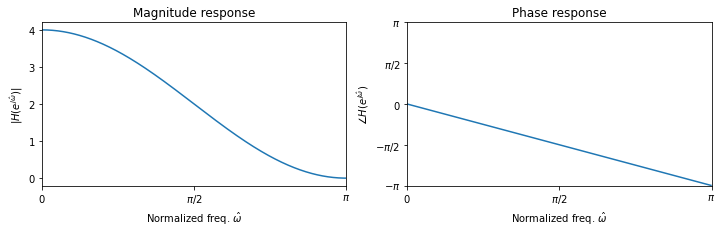

In [5]:
plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(w,np.abs(H))
plt.xticks(half_ticks, half_labels)
plt.xlabel("Normalized freq. $\hat{\omega}}$")
plt.ylabel("$\|H(e^{j\hat{\omega}})|$")
plt.title("Magnitude response")
plt.xlim(half_lim)
plt.subplot(122)
plt.plot(w, np.angle(H))
plt.xticks(half_ticks, half_labels)
plt.xlabel("Normalized freq. $\hat{\omega}}$")
plt.yticks(whole_ticks, whole_labels)
plt.ylabel(r"$\angle H(e^{j\hat{\omega}})$")
plt.title("Phase response")
plt.xlim(half_lim)
plt.ylim(whole_lim)
plt.show()

##### 1.2
임펄스 응답이 다음과 같이 주어지는 FIR 필터의 주파수 응답을 그려라.

$$h[n] = \{\underset{\uparrow}{1}, 2, 1 \}$$

<img src='frequency-response-whole-121.png' />

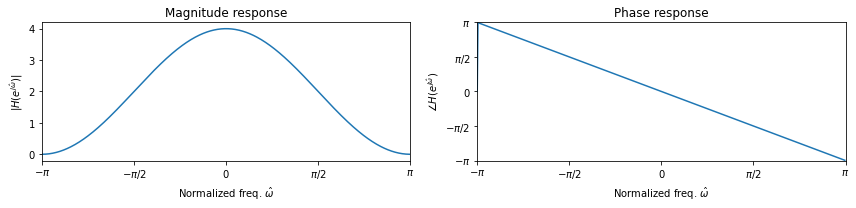

In [6]:
h = [1,2,1]
N = 512
w, H = sig.freqz(h, worN=N, whole=True)
w = w - np.pi
H = np.roll(H, N//2)


plt.figure(figsize=(12,3))
plt.subplot(121)
plt.plot(w,np.abs(H))
plt.xticks(whole_ticks, whole_labels)
plt.xlabel("Normalized freq. $\hat{\omega}}$")
plt.ylabel("$\|H(e^{j\hat{\omega}})|$")
plt.title("Magnitude response")
plt.xlim(whole_lim)
plt.subplot(122)
plt.plot(w, np.angle(H))
plt.xticks(whole_ticks, whole_labels)
plt.xlabel("Normalized freq. $\hat{\omega}}$")
plt.yticks(whole_ticks, whole_labels)
plt.ylabel(r"$\angle H(e^{j\hat{\omega}})$")
plt.title("Phase response")
plt.xlim(whole_lim)
plt.ylim(whole_lim)
plt.tight_layout()
plt.show()

#### 문제 2.
문제 1의 프로그램을 참고해서 임의의 임펄스 응답 h의 주파수 크기 응답과 위상 응답 그래프를 그리는 함수 plot_frequency_response(h)를 작성하라.

In [7]:
def plot_frequency_response(h):
    
    w, H = sig.freqz(h)
    
    whole_labels=["$-\pi$", "$-\pi/2$", "$0$", "$\pi/2$", "$\pi$"]
    half_labels=["$0$", "$\pi/2$", "$\pi$"]
    whole_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    half_ticks = [0, np.pi/2, np.pi]
    half_lim = (0, np.pi)
    whole_lim = (-np.pi, np.pi)

    

    plt.figure(figsize=(12,3))
    plt.subplot(121)
    plt.plot(w,np.abs(H))
    plt.xticks(half_ticks, half_labels)
    plt.xlabel("Normalized freq.")
    plt.ylabel("$\|H(e^{j\hat{\omega}})|$")
    plt.title("Magnitude response")
    plt.xlim(half_lim)
    
    plt.subplot(122)
    plt.plot(w, np.angle(H))
    plt.xticks(half_ticks, half_labels)
    plt.xlabel("Normalized freq. $\hat{\omega}}$")
    plt.yticks(whole_ticks, whole_labels)
    plt.ylabel(r"$\angle H(e^{j\hat{\omega}})$")
    plt.title("Phase response")
    plt.xlim(half_lim)
    plt.ylim(whole_lim)
    plt.tight_layout()
    plt.show()

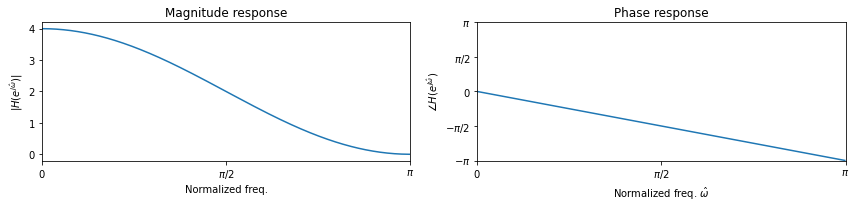

In [8]:
h = np.array([1, 2, 1])
plot_frequency_response(h)

In [9]:
def plot_frequency_response_2(h, worN=512, whole=False):
    
    w, H = sig.freqz(h, worN=worN, whole=whole)
    
    whole_labels=["$-\pi$", "$-\pi/2$", "$0$", "$\pi/2$", "$\pi$"]
    half_labels=["$0$", "$\pi/2$", "$\pi$"]
    whole_ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
    half_ticks = [0, np.pi/2, np.pi]
    half_lim = (0, np.pi)
    whole_lim = (-np.pi, np.pi)
    
    if whole:
        ticks = whole_ticks
        labels = whole_labels
        w = w - np.pi
        H = np.roll(H, worN//2)
        xlim = whole_lim
    else:
        ticks = half_ticks
        labels = half_labels
        xlim = half_lim
        
    plt.figure(figsize=(12,3))
    
    plt.subplot(121)
    plt.plot(w, np.abs(H))
    plt.title('Magnitude response')
    plt.xlabel('Normalized freq.')
    plt.xlim(xlim)
    plt.xticks(ticks, labels)
    plt.ylabel("$|H(e^{j\hat{\omega}})|$")

    plt.subplot(122)
    plt.plot(w, np.angle(H))
    plt.title('Phase response')
    plt.xlabel('Normalized freq.')
    plt.xlim(xlim)
    plt.xticks(ticks, labels)
    plt.yticks(whole_ticks, whole_labels)
    plt.ylabel(r"$\angle H(e^{j\hat{\omega}})$")
    plt.ylim(whole_lim)
    plt.tight_layout()
    plt.show()

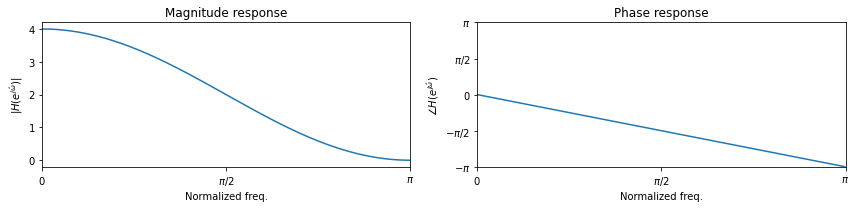

In [10]:
h = np.array([1, 2, 1])
plot_frequency_response_2(h)

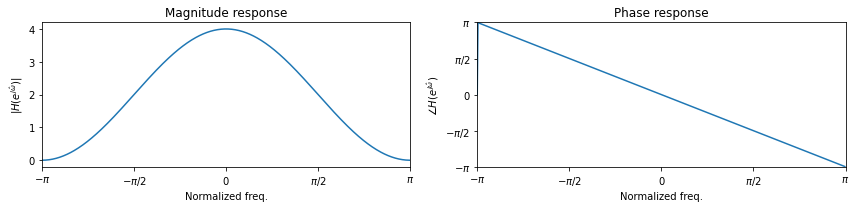

In [11]:
h = np.array([1, 2, 1])
plot_frequency_response_2(h, whole=True)

#### 문제 2. 이동 평균 필터(Moving average filter)의 주파수 응답 

##### 2.1
3점 이동 평균 필터(Moving average filter)의 주파수 응답을 그려라.

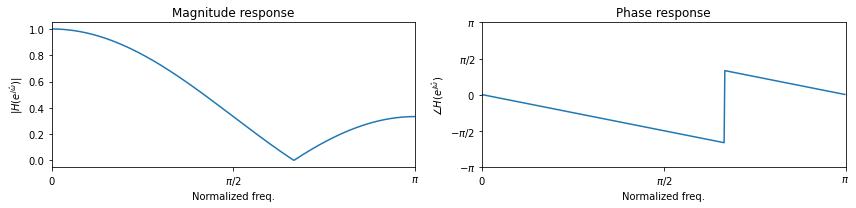

In [12]:
ma3 = np.full(3, 1/3)
plot_frequency_response_2(ma3)

##### 2.2
다음과 같은 3 개의 정현파 신호를 샘플링한 이산 시간 신호를 3점 이동평균 필터에 입력했을 때, 각 입력 신호와 출력 신호의 그래프를 그려라. 단, 연속시간 신호를 샘플링할 때 사용한 샘플링 주파수는 $f_s = 60$ Hz라고 가정하고, 그래프를 그릴 때 $t$의 범위는 $[0, 1]$로 한다.

- $x_1(t) = 2 \cos(2\pi(10)t)$
- $x_2(t) = 2 \cos(2\pi(20)t)$
- $x_3(t) = 2 \cos(2\pi(30)t)$

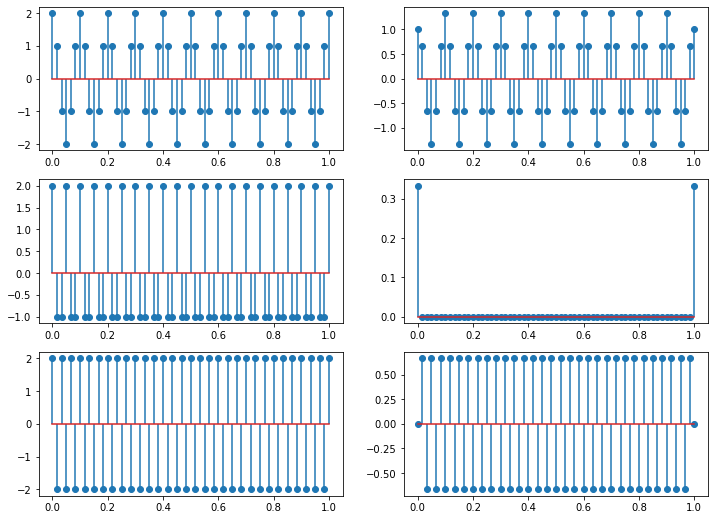

In [19]:
fs = 60
Ts = 1 / fs
f1 = 10
f2 = 20
f3 = 30

t = np.arange(0, 1+Ts, Ts)
x1 = 2*np.cos(2*np.pi*f1*t)
x2 = 2*np.cos(2*np.pi*f2*t)
x3 = 2*np.cos(2*np.pi*f3*t)

y1 = np.convolve(ma3, x1, mode='same')
y2 = np.convolve(ma3, x2, mode='same')
y3 = np.convolve(ma3, x3, mode='same')

plt.figure(figsize=(12,9))
plt.subplot(321)
plt.stem(t,x1)
plt.subplot(322)
plt.stem(t,y1)
plt.subplot(323)
plt.stem(t,x2)
plt.subplot(324)
plt.stem(t,y2)
plt.subplot(325)
plt.stem(t,x3)
plt.subplot(326)
plt.stem(t,y3)
plt.show()

##### 2.3
위의 세 신호에 3점 FIR 필터를 적용했을 때 왜 크기가 달라지는지 설명하라.

$y_1[n] = H(e^{j\hat{\omega}_1}) x_1[n]$

$\hat{\omega}_1 = 2\pi f_1 / f_s$

##### 2.4
5점 이동 평균 필터(Moving average filter)의 주파수 응답을 그려라.

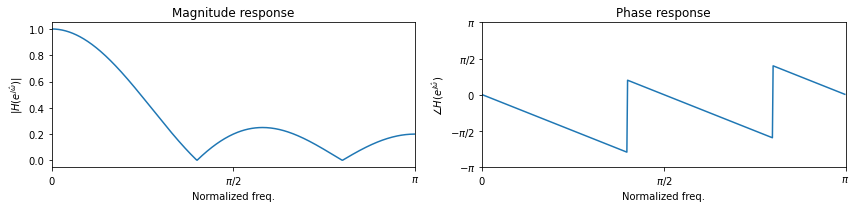

In [59]:
ma5 = np.full(5, 1/5)
plot_frequency_response_2(ma5)

##### 2.5
7점 이동 평균 필터(Moving average filter)의 주파수 응답을 그려라.

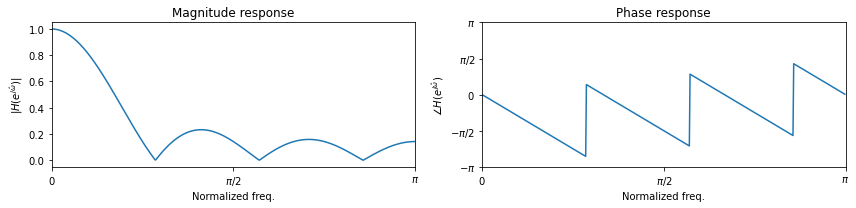

In [62]:
ma7 = np.full(7, 1/7)
plot_frequency_response_2(ma7)

##### 2.6
8점 이동 평균 필터(Moving average filter)의 주파수 응답을 그려라.

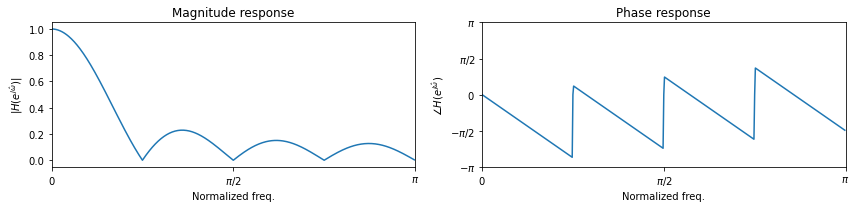

In [63]:
ma8 = np.full(8, 1/8)
plot_frequency_response_2(ma8)

##### 2.7 
이동 평균 필터(Moving average filter)의 임펄스 응답의 길이 (필터의 길이)가 증가할수록 주파수 크기 응답에 어떤 변화가 나타나는지 설명하라.

pass band의 폭이 점점 좁아진다

#### 문제 3. 고역통과필터(High-pass filter)

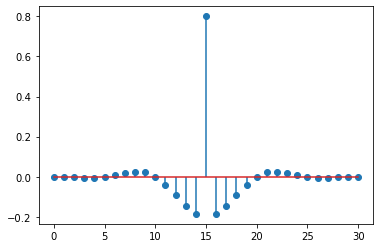

In [64]:
h_hp = sig.firwin(31, 0.2, pass_zero=False)

plt.stem(h_hp)
plt.show()

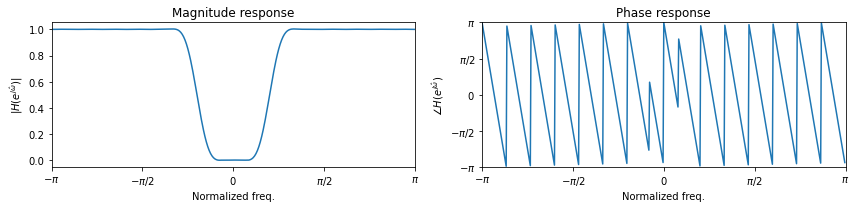

In [65]:
plot_frequency_response_2(h_hp, whole=True)

#### 문제 4. 대역통과필터(Band-pass filter)

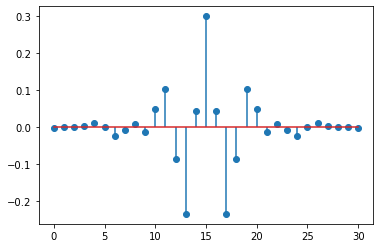

In [72]:
h_bp = sig.firwin(31, [0.3, 0.6], pass_zero=False)
plt.stem(h_bp)
plt.show()

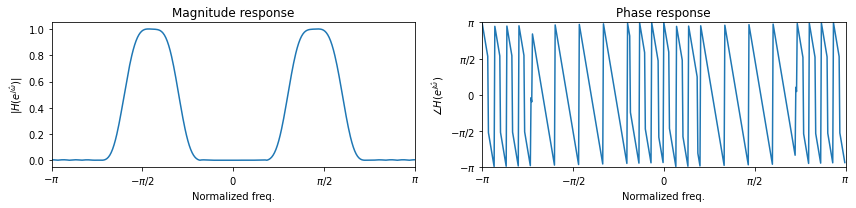

In [68]:
plot_frequency_response_2(h_bp, whole=True)

#### 문제 5. 대역저지필터(Band-stop filter)

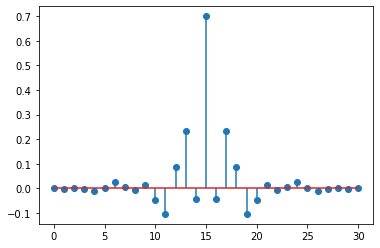

In [71]:
h_bs = sig.firwin(31, [0.3, 0.6], pass_zero=True)
plt.stem(h_bs)
plt.show()

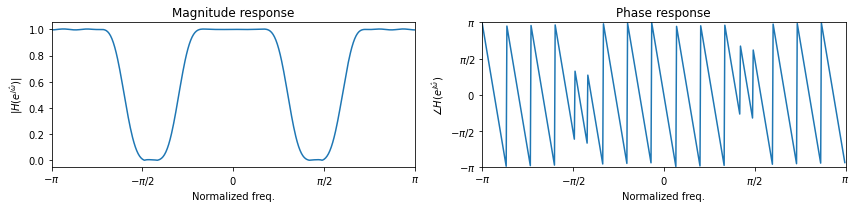

In [70]:
plot_frequency_response_2(h_bs, whole=True)